<a href="https://colab.research.google.com/github/milov33/-analytics/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Валерий! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Любой проект, как учебный, так и реальный, начинается с его описания, содержащего: описание контекста, цель и краткий план исследования. Надо его написать. Просто задание проекта изложить своими словами.</font>

Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Общая информация

Описание данных 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1899]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# черная тема для графиков
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
#plt.style.use ('dark_background')
pd.options.display.max_rows = 100
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [1900]:
# загрузим данные в датафрейм
try:
  df = pd.read_csv('/content/games.csv')
except:
  df = pd.read_csv('/datasets/games.csv')

In [1901]:
# выведем первые 10 строк датафрейма
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [1902]:
# посмотрим общую информацию датайфрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание: 
Изучив общую информацию выявили что необходимо:
- привести к нижнему регистру назавния столбцов (так будет удобнее работать с переменными, меньше вероятность ошибиться в написании)
- обработать пропущенные значения в столбцах name, year_of_release, genre, critic_score, user_score, rating
- исправить тип данных в столбце year_of_release на int
- исправить тип данные в столбце user_score на float



---



# Подготовка данных

Задача:
- Замените названия столбцов (приведите к нижнему регистру)

In [1903]:
# приведем к нижнему регистру названия столбцов 
#df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Исправил</font><br>

Задача:
- Обработайте пропуски при необходимости:
  
1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
2. Опишите причины, которые могли привести к пропускам;
3. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [1904]:
# приедем к нижнему регистру названия игр
#df['name'] = df['name'].str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А стоит ли переводить в нижний регистр наименования брендов? Это же все таки имена собственные.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Исправил</font><br>

In [1905]:
# проверим датасет на наличие явных дубликатов
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, иногда они сильно искажают анализ.</font>

Пропуски 

In [1906]:
# Посмотрим на процент пропусков в каждом столбце
for i in df.columns:
    _ = len(df.loc[df[i].isnull()])
    if _ > 0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(i, _, _/df.shape[0]))

- name - содержит 2 пропусков (0.0% от всех)
- year_of_release - содержит 269 пропусков (1.6% от всех)
- genre - содержит 2 пропусков (0.0% от всех)
- critic_score - содержит 8578 пропусков (51.3% от всех)
- user_score - содержит 6701 пропусков (40.1% от всех)
- rating - содержит 6766 пропусков (40.5% от всех)


In [1907]:
# Удалим пропущенные значения в name
df.dropna(subset=['name'], inplace=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [1908]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Отлично, вместе с удаленными прпущенными значениями в name ушли и пропуски из genre

In [1909]:
# удалим пропущенные значения в year_of_release
df.dropna(subset=['year_of_release'], inplace=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильное решение по удалению пропусков в годе релиза. Хорошо, что было проверено количество пропусков.</font>

In [1910]:
# заменим значение в user_score с tbd на NaN и изменим его тип на float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [1911]:
# установим "заглушку" вместо пропущенных значений
df['rating'] = df['rating'].fillna("plug")

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

In [1912]:
# проверим что пропуски обработаны
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Описание:


1. Пропущенные значения в name, genre и year_of_release имеют маленький процент от общего количества значений, гораздо меньше 5% поэтому было принято решение удалить такие пропуски.
В столбах critic_score, user_score и rating процент пропущенных значений выше 40%, заполнять их медианой или темболее средней, ознаает добавить шума в данные, удалить такой объем данных тоже не правильное решение. Пришел к выводу что проще оставить все в виде пропусков и учесть их при анализе. Установим "заглушку" вместо пропусков в столбце rating


2. Пропуски в 
- name и genre возможно имеют техническую природу появления, они образовались в одних и тех же строках.
- year_release пропуски могли появиться в виду отсутствия данных о релизе игры или указаны были не в том поле откуда сборщик информации считывал даные о дате релиза.

- critic_score и user_score
Платформы собирающие игровые рейтинги стали появляться только в конце 90-х годов(IGN - 1996, Igromania - 1997, Metacritic - 1998). Соответственно критики и пользователи получили возможность оценивать игры только с появлением этих платформ. Также "свежие" игры могли не набрать достаточного количества оценок для получения определенного рейтинга. На это косвенно указывает и то, что пропущенных значений примерно поровну в этих двух столбцах. 

- raiting
Крупнейшая негосударственная организация (ESRB), основана в 1994 году. игры выпущенные до этого года не получили соответствующего рейтинга. К тому же ESRB это рейтинговое агенство США и Канады, в европе есть свое - PEGI, а в Японии CERO, поэтому пропуски в столбце rating выглядят вполне объяснимыми

3. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Вероятнее всего игра не получила достаточного минимального количества оценок для получения рейтинга



---



Задача: 
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [1913]:
# посмотрим на распределение типов данных
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [1914]:
# заменим тип данных в year_of_release с float на int
df['year_of_release'] = df['year_of_release'].convert_dtypes()

Описание:
- year_of_release столбец содержит год релиза,  целочисленно значение поэтому поменял его на int
- user_score в этом столбце данные схожи со столбцом critic_score они оба содержат значения соответствующие типу float на него и заменяем



---



Задача:
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [1915]:
# создадим столбец содержащий в себе продажи по всем регионам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 </font>

In [1916]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>Спасибо, полезная штука</font><br>

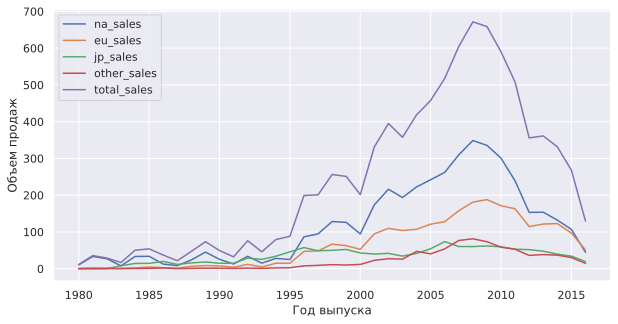

In [1917]:
# посмотрим как распределены продажи по регионам
sales_df = df[[x for x in df.columns if 'sales' in x] + ['year_of_release']]
sales_df.groupby('year_of_release').sum().plot()
plt.xlabel('Год выпуска')
plt.ylabel('Объем продаж')
plt.show()

Описание:
Рынки Северной Америки и Европы существенно прибыльнее Японского и остальных стран. Но они все имеют нисходящий тренд начиная с 2008 года

# Исследовательский анализ

- Задача:
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Решение:

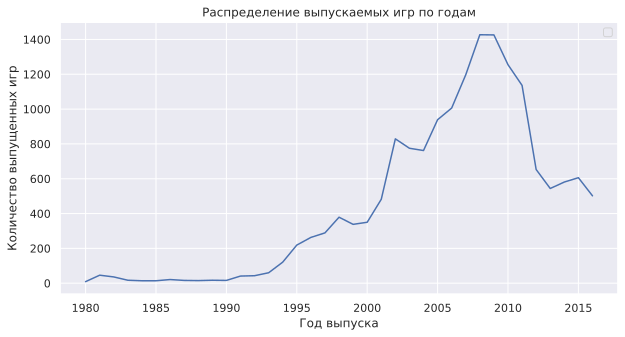

In [1918]:
# построим график распределения количества проданных игр по годам
sns.lineplot(data=df.pivot_table(index='year_of_release', values='name', aggfunc='count'))
plt.title('Распределение выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.legend('')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Описание результата:
Рынок игровой индустрии получил свое развитие начиная с 5-го поколения (1993-2000) тогдаже появились консоли PS и 3DO. Также и домашние ПК стали из "рабочих лошадок" переходить и к инструменту для геймеров. А после 2009 года свое развитие получили мобильные игры и постепенно стали занимать все больший рынок.
В 2014 году есть небольшая коррекция, поэтому для анализа возьму период с 2014 по 2016 годы



---



Задача: 
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Решение:

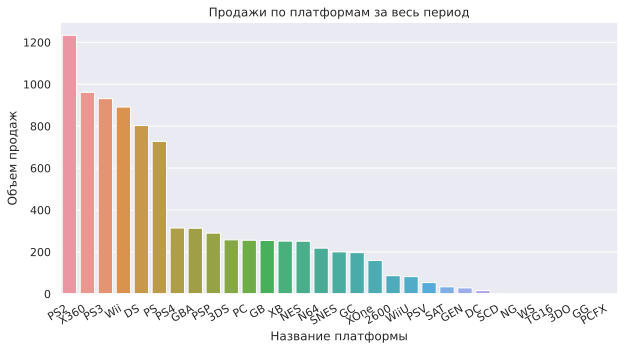

In [1919]:
# создадим график с продажами по платформам за весь период
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
plt.xticks(rotation=30, horizontalalignment='right')
sns.barplot(x=sales_by_platform.index,y=sales_by_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Объем продаж")
plt.show()

In [1920]:
# чтобы график не получился нечитаемым, выберем 10 платформ
# и посмотрим как распределились продажи по годам
top10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne', '3DS', 'PC']

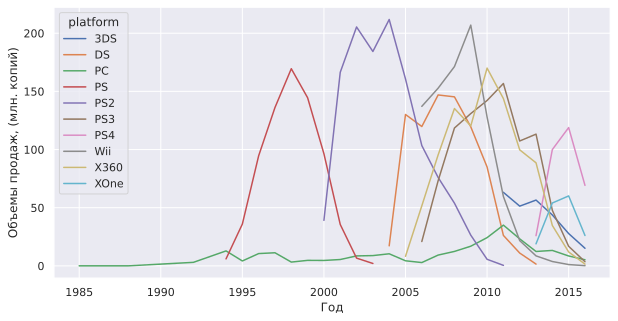

In [1921]:
# построим график с сумарными продажами по годам
df.query('platform in @top10_platforms').pivot_table(
    index='year_of_release', 
    columns = 'platform', 
    values='total_sales', 
    aggfunc='sum').plot()
plt.xlabel('Год')
plt.ylabel('Объемы продаж, (млн. копий)')
plt.show()

In [1922]:
# Зададим переменную в которой посчитаем период жизни платформ 
live_period = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       ).sort_values('year_of_release')

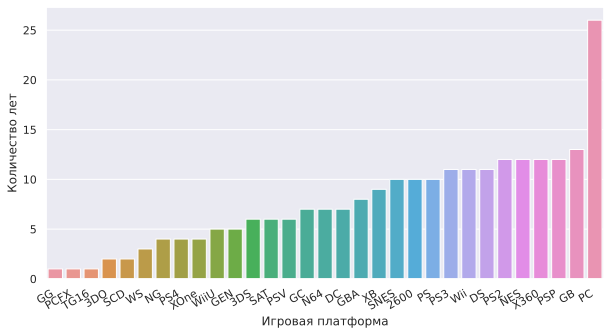

In [1923]:
# построим график отображающий период жизни платформ
plt.xticks(rotation=30, horizontalalignment='right')
sns.barplot(x=live_period.index, y='year_of_release', data=live_period)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество лет')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы отсортировать платформы по году.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Исправил</font><br>

In [1924]:
# методом describe узнаем средний период жизни платформ
live_period.describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


In [1925]:
# добавим в переменную top_platforms платформы с наибольшими продажами 
# и не потерявшими своей актуальности в период который мы будем анализировать (2014-2016)
top_platforms = ['PS3', 'XOne', 'PS4', 'WiiU', '3DS']

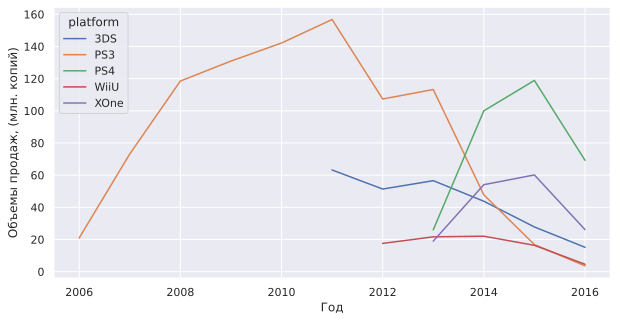

In [1926]:
# посмотрим как распределялись продажи по выбранным платформам
data_temp = df.loc[df['platform'].isin(top_platforms)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
data_temp.plot()
plt.xlabel('Год')
plt.ylabel('Объемы продаж, (млн. копий)')
plt.show()

Описание:
У всех платформ присутсвует стремительный рост и такое же стремительное падение, оно объясняется новизной самой платформы, тем что с ее появлением запускаются маркетинговые компании по продвижению продаж и соответственно новые игры. Сменяемость одной платормы другой хорошо прослеживается на графике с объемами продаж по годам. Из всех платформ только PC идет своей дорогой и является самым долгожителем среди остальных (26 лет), а средняя продолжительность платформ составляет 7 лет. 
Отобрал 5 платформ для дальнейшего анализа и на графике распределения объема продаж по годам наблюдается тот же подходящий период с 2014 по 2016 годы



---



Задача:
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [1927]:
# отсортируем данные за кутальный период
current_period = df[df['year_of_release'] >= 2014]

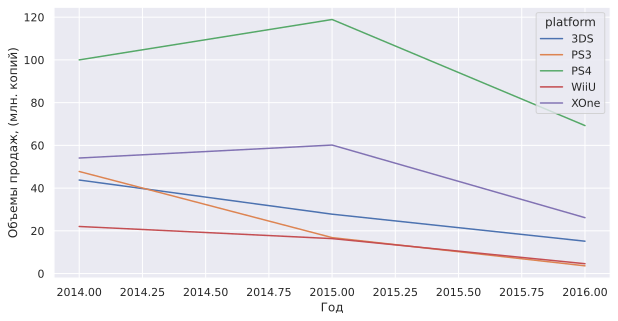

In [1928]:
# построим график за актуальный период по потенциально прибыльным платформам
current_period.query('platform in @top_platforms').pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'
    ).plot()
plt.xlabel('Год')
plt.ylabel('Объемы продаж, (млн. копий)')
plt.show()

Описание:
Актуальным периодом я определил 2014-2016 годы так как в этот период появляются новые платформы и происходила коррекция в продажах. Даже при расмотрении актуального периода по свежим платформам наблюдается тренд на снижение 



---



Задача:
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

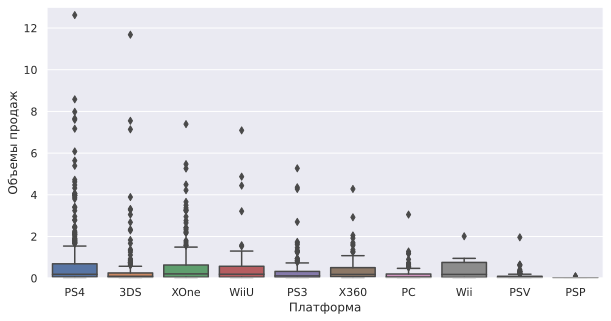

In [1929]:
# построим общую картину по ящику с усами с выбросами
plt.ylim(0, 13)
sns.boxplot(data=current_period.sort_values(by='total_sales', ascending=False), 
            x='platform', 
            y='total_sales')
plt.xlabel('Платформа')
plt.ylabel('Объемы продаж')
plt.show()

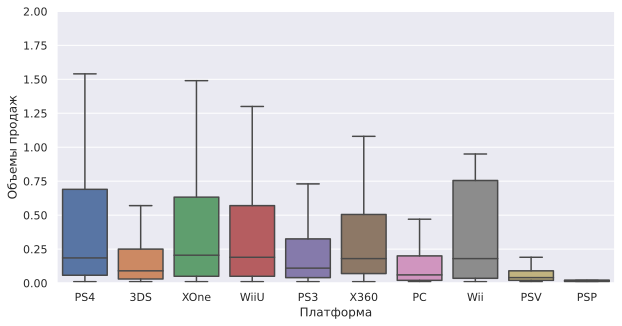

In [1930]:
# посмотрим ящик с усами без выбросов
plt.ylim(0, 2)
sns.boxplot(data=current_period.sort_values(by='total_sales', ascending=False), 
            x='platform', 
            y='total_sales',
            showfliers=False)
plt.xlabel('Платформа')
plt.ylabel('Объемы продаж')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что диаграммы размаха сделали в двух видах, в полном со всеми вылетами и в масштабированном виде, где хорошо видны боксплоты. </font>

Описание:
Медианное значение большинства топовых платформ не привышает $0,25 мл
PS4 и XOne платформы одного уровня и были выпущены в один год, много игр которые выпущены для обеих платформ и также платформы развивют игры выпускаемые только на их платформах. Японский производитель Nintendo тоже показывает хорошие результаты, медианные значения платформы WiiU и Wii находятся на одном уровне с Microspft - XOne и Sony - Sony play station 4
Предположу что показатели платформы 3DS в основном получены от популярных на то время серии игр pokemon выпущенных для данной консоли в период с 2010 по 2016 годы



---



Задача:
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода мы дальнейший анализ делаем только за этот период.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Исправил</font><br>

In [1931]:
# создадим переменные с оценками критиков и пользователей без нулевых значений
#PS4 = current_period[(current_period['platform'] == 'PS4') & (current_period['user_score'] > 0)].copy()
#XOne = current_period[(current_period['platform'] == 'XOne') & (current_period['critic_score'] > 0) & (current_period['user_score'] > 0)].copy()
#PS3 = current_period[(current_period['platform'] == 'PS3') & (current_period['critic_score'] > 0) & (current_period['user_score'] > 0)].copy()
#DS3 = current_period[(current_period['platform'] == '3DS') & (current_period['critic_score'] > 0) & (current_period['user_score'] > 0)].copy()
#WiiU = current_period[(current_period['platform'] == 'WiiU') & (current_period['critic_score'] > 0) & (current_period['user_score'] > 0)].copy()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Как-то мы оптом отфильтровываем пропуски. Если мы анализируем отзывы пользователей, то фильтруем по ним. Если анализируем отзывы критиков, то фильтруем их. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции, так как в строках где есть пропуски по одному отзыву есть значимые данные по другому виду отзывов и наоборот. См.код ниже. Но на самом деле, нам пропуски не мешают ни в построении диаграмм рассеяния, ни в расчете корреляции.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Ошибку понял. Исправил</font><br>

In [1932]:
# Комментарий ревьюера
print(len(df[df['critic_score'] > 0]))
print(len(df[df['user_score'] > 0]))
print(len(df[(df['critic_score'] > 0) & (df['user_score'] > 0)]))

7983
7462
6894


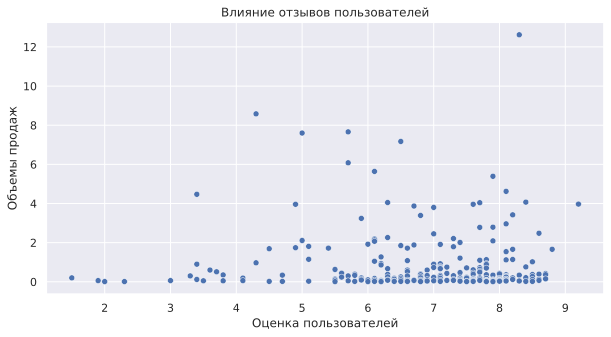

In [1933]:
# построим дуаграмму рассеивания и посмотрим как распределены продажи относительно оценко пользователей
PS4 = current_period[(current_period['platform'] == 'PS4') & (current_period['user_score'] > 0)].copy()
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.title('Влияние отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Объемы продаж')
plt.show()

In [1934]:
# посмотрим на корреляцию продаж и оценок пользователей по платформе PS4
PS4['user_score'].corr(PS4['total_sales'])

-0.040131589472697356

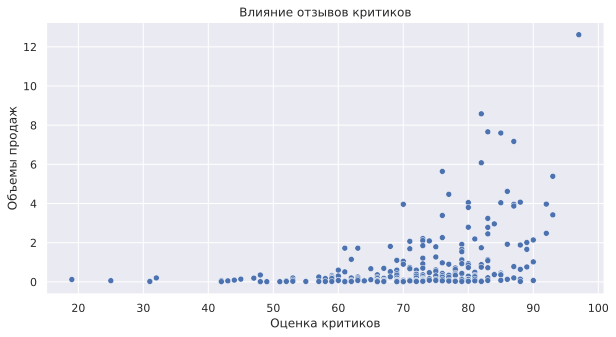

In [1935]:
# построим дуаграмму рассеивания и посмотрим как распределены продажи относительно оценко критиков
PS4 = current_period[(current_period['platform'] == 'PS4') & (current_period['critic_score'] > 0)].copy()
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.title('Влияние отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объемы продаж')
plt.show()

In [1936]:
# посмотрим на корреляцию продаж и оценок критиков по платформе PS4
PS4['critic_score'].corr(PS4['total_sales'])

0.40266141068104083

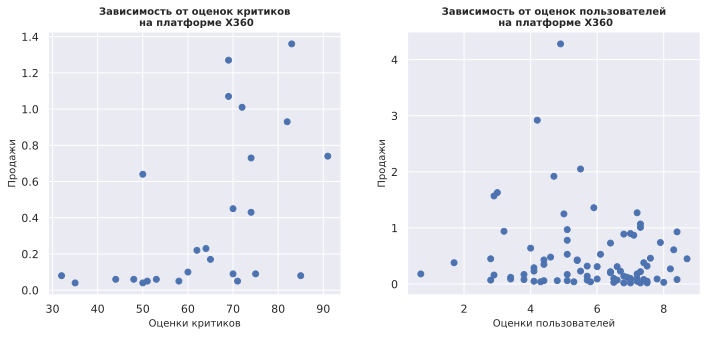

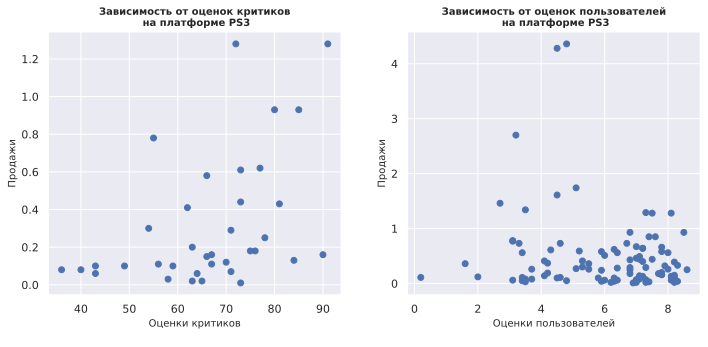

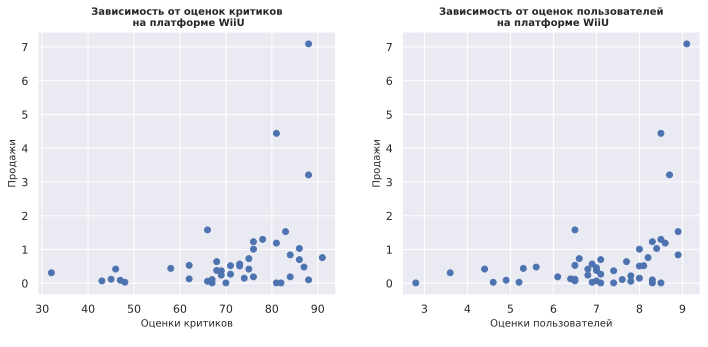

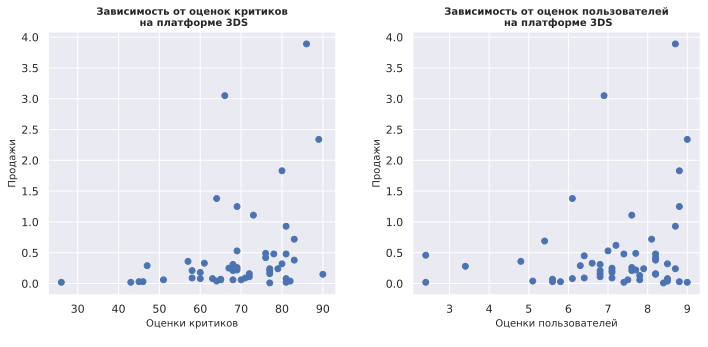

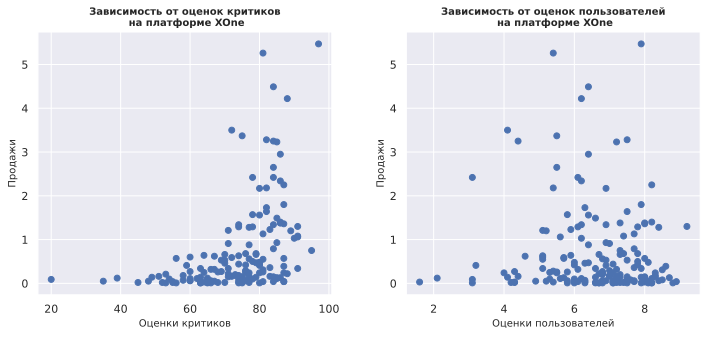

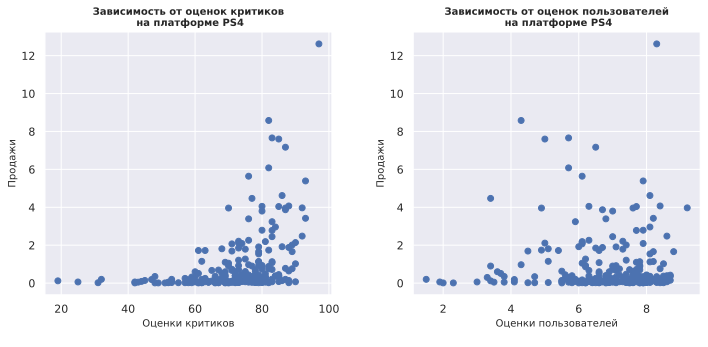

In [1937]:
# используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей расположим рядом слева и справа соответственно
top_platforms = ['X360', 'PS3', 'WiiU', '3DS', 'XOne', 'PS4']
for name_platform in top_platforms:
    x_critic = current_period[current_period['platform'] == name_platform]['critic_score']
    y_critic = current_period[current_period['platform'] == name_platform]['total_sales']
    
    x_user = current_period[current_period['platform'] == name_platform]['user_score']
    y_user = current_period[current_period['platform'] == name_platform]['total_sales']
    
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость от оценок критиков\n на платформе '+name_platform, fontsize=10, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=10)
    ax1.set_ylabel('Продажи', fontsize=10)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость от оценок пользователей\n на платформе '+name_platform, fontsize=10, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=10)
    ax2.set_ylabel('Продажи', fontsize=10)
    
    plt.tight_layout(w_pad=3)

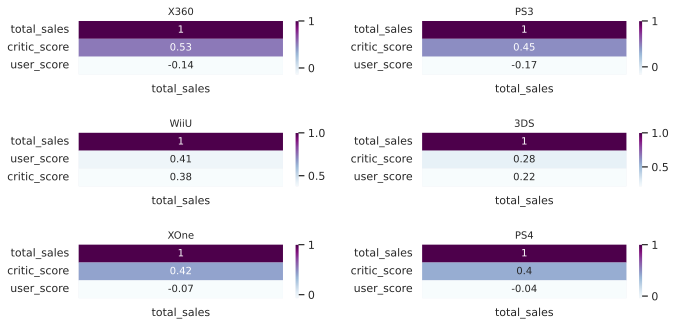

In [1938]:
# Расчитаем корреляцию и соотнесем данные с продажами по другим платформам
top_platforms = ['X360', 'PS3', 'WiiU', '3DS', 'XOne', 'PS4']
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10,5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = current_period[(current_period['platform'] == curr_platform) & (current_period['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="BuPu", annot=True, annot_kws={'size':10}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=2)
        count += 1

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> Предполагается, что мы построим диаграммы рассеяния, а не только посчитаем корреляции и для других платформ. Выводы, сделанные на основе расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. И можно сделать циклом.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>👌 Графики добавил и переписал вывод</font><br>

Описание:
Сравнивая диаграммы рассеяния по платформе PS4 можно увидеть умеренную связь меду оценкой критиков и объемом продаж, а между оценкой пользователей и объемом продаж связь слабо отрицательная, что говорит о большем влиянии оценок критиков на продажи игр на платформе PS4. Этот вывод подстверждается и при рассмотрении расчетов корреляции по другим платформам из Северной Америки и Европы. 
Для анализа этих регионов я взял конкурирующие платформы  в разный период вреени PS3 c X360 и PS4 c xOne. Рассматривая платформы 3DS и WiiU, популярные в Японии мы видим другие результаты, там показатели корреляции оценок критиков схожи с показателями оценки пользователей и имеют умеренную связь с объемами продаж.
Вывод из анализа следующий, оценка критиков имеет влияние на продажами в Северной Америке, Европе и в Японии. Японский рынок в отличие от остальных также имеет умеренное влияние на продажи и от оценок пользователей. 





---



Задача:
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

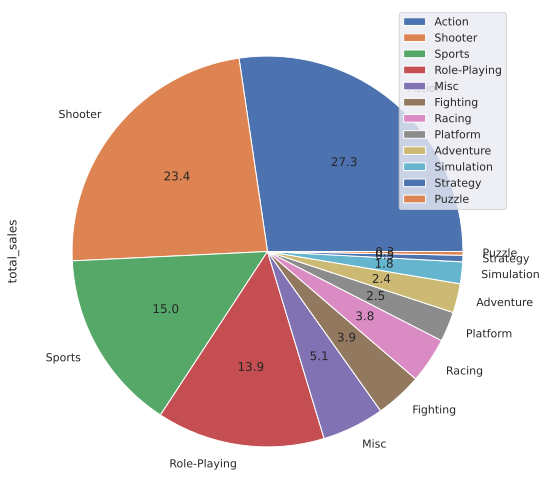

In [1939]:
# посмотрим как распределены жанры игр в процентах от общего объема продаж
current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(
        kind='pie', autopct='%.1f',figsize=(9, 9), y= 'total_sales')
plt.show()

In [1940]:
# посмотрим как распределены объемы продаж по жанрам 
current_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(
    ascending=False, by = 'total_sales')

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


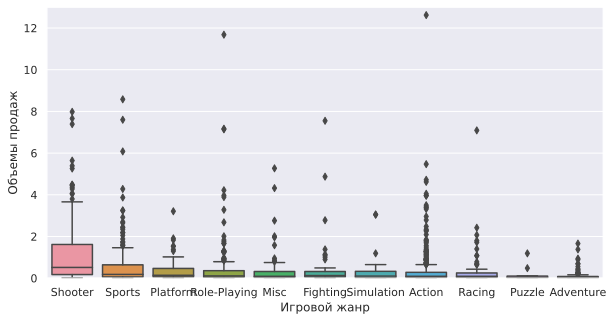

In [1941]:
# посмотрим на распределение построив ящик с усами с выбросами
plt.ylim(0, 13)
sns.boxplot(data=current_period.sort_values(by='total_sales', ascending=False), 
            x='genre', 
            y='total_sales', 
            order=['Shooter','Sports','Platform','Role-Playing','Misc','Fighting', \
                    'Simulation', 'Action', 'Racing', 'Puzzle', 'Adventure'], 
            )
plt.xlabel('Игровой жанр')
plt.ylabel('Объемы продаж')
plt.show()

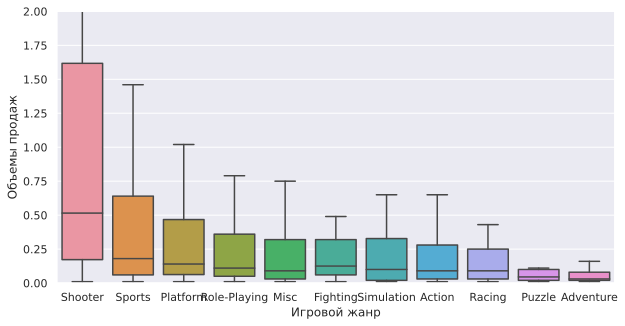

In [1942]:
# посмотрим на распределение построив ящик с усами без выбросов
plt.ylim(0, 2)
sns.boxplot(data=current_period.sort_values(by='total_sales', ascending=False), 
            x='genre', 
            y='total_sales', 
            order=['Shooter','Sports','Platform','Role-Playing','Misc','Fighting', \
                    'Simulation', 'Action', 'Racing', 'Puzzle', 'Adventure'], 
            showfliers=False)
plt.xlabel('Игровой жанр')
plt.ylabel('Объемы продаж')
plt.show()

Описание:
Shooter имеет медианное значение превышающее $0.5 млн. и 75 процентиль  превышает $1.5 млн., тем неменее жанр Action имеет такие выбросы что общие продажи опережают жанр Shooter
Игры в жанре Action самые прибыльные.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br>
<font color='DarkMagenta'>👉 Правильный анализ, но не корректный вывод. Нам надо определить самый прибыльный жанр.</font><br>
<font color='DarkGreen'>👌 Хороший анализ. Многие попадают в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font>



---



# Портрет пользователя

Задача:

Определите для пользователя каждого региона (NA,EU, JP): 

1.   Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2.   Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?





---
1.


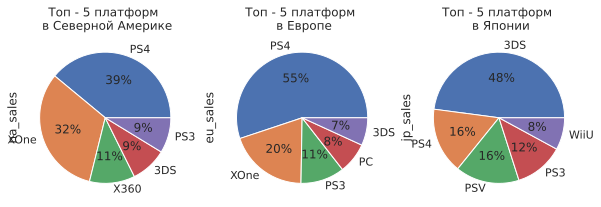

In [1943]:
plt.subplot(1,3,1)
current_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 платформ \n в Северной Америке')

plt.subplot(1,3,2)
current_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 платформ \n в Европе')

plt.subplot(1,3,3)
current_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 платформ \n в Японии')
plt.show()

Описание:
В Европе и Северной Америке популярностью пользуются одни и теже платформы, присутствуют небольшие расхождения среди замыкающих тройку лидеров. Рынок Янонии имеет свои предпочтения, там с большим отрывом лидирует портативная платформа 3DS, а второе место разделила PS4 и портативная консоль от Sony - PSV



---

2. 

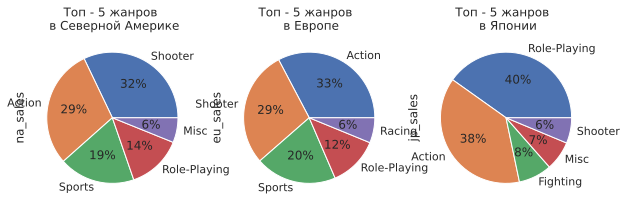

In [1944]:
plt.subplot(1,3,1)
current_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 жанров \n в Северной Америке')

plt.subplot(1,3,2)
current_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 жанров  \n в Европе')

plt.subplot(1,3,3)
current_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind = 'pie',
    subplots = True,
    figsize = (5, 5),
    autopct = '%.0f%%'
)
plt.title('Топ - 5 жанров  \n в Японии')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо сделан анализ и визуализирован круговыми диаграммами. А вот данные не вошедшие в ТОП, как правило, суммируют и выводят отдельной группой "Другие". Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.  Примерно вот так:</font>
![image.png](attachment:image.png)

Описание:
Предпочтения пользователей из Северной Америки и Европы сходятся и в выборе жанра игры, в Северной Америке предпочитают shooter чуть больше чем action и sport, а в Европе наоборот предпочтение отдано action и уже после него shooter и sports.
Рынок Японии снова имеет свое отличие, тут преобладает жанр RPG royal plaing game, а сразу за ним ation. 



---

3. 

In [1945]:
esrb_rating = current_period.pivot_table(index='rating', 
                                         values=['na_sales','eu_sales','jp_sales'],
                                         aggfunc='sum').apply(
                                             lambda col:col/col.sum()).style.format("{:.1%}")
display(esrb_rating)

,eu_sales,jp_sales,na_sales
rating,,,
E,21.4%,9.6%,17.9%
E10+,9.7%,4.8%,11.7%
M,34.5%,8.6%,33.9%
T,12.6%,15.9%,13.7%
plug,21.8%,61.1%,22.8%


Описание: 
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»

Снова Европейский и Северо Американский рынок очень похожи хотя в Европе и присутсвует своя рейтинговая система Pan European Game Information (PEGI) тем неменее в Европе рейтинг ESRB влияет на продажи. В Японии рейтинг ESRB не оказывает влияния если только на подростковые игры, так как в японии игры оцениваются своей рейтинговой организацией CERO отсюда и такой показатель в 61% без рейтинга.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильный анализ, но не корректный вывод.</font><br>
<font color='DarkGreen'>👌 Дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных. 👍</font>



---



# Проверка гипотез

Задача:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза (Н0) — предположение о том, что между  параметрами генеральных совокупностей нет различий, то есть эти различия носят не систематический, а случайный характер.

Альтернативная гипотеза (Н1) – предположение о том, что между параметрами генеральных совокупностей есть достоверные различия.

Для статистических тестов в проверки обеих гепотиз мы зададим уровень значимости в 0.05 так как он позволяет с вероятностью в 95% быть уверенным что полученные данные не случайны.
Также посмотрим на распределение пользовательских оценок

Сформулируем гипотезы:
- H0: Средние пользовательские рейтинги платформ xbox One и PC равны
- H1: средние пользовательские рейтинги платформ xbox One и PC не равны


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [1946]:
# посмотрим как распределились пользовательские рейтинги платформ не учитывая нашу "заглушку"
rating_xone = current_period.query('platform == "XOne"')['user_score'].dropna()
rating_pc = current_period.query('platform == "PC"')['user_score'].dropna()
print('Средний пользовательский рейтинг платформы Xbox One:', rating_xone.mean())
print('Средний пользовательский рейтинг платформы PC', rating_pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо, что отфильтровали пропуски. Только для этого лучше использовать стандартные методы.</font>

In [1947]:
# уровень значимости 5%
alpha = .05

results = st.ttest_ind(rating_xone, rating_pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Вывод: У нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font><br>
<font color='Red'>🛠 Не сформулирован вывод теста гипотезы. </font>



---



В этой гипотезе нам также нужно сравнить средние двух выборок, поэтому применим тот же тест ttest_ind.

Сформулируем гипотезы:
- Н0: Средние пользовательские рейтинги жанров Action и Sports равны.
- Н1: Средние пользовательские рейтинги жанров Action и Sports не равны.


In [1948]:
# посмотрим как распределились пользовательские рейтинги жанров не учитывая нашу "заглушку"
rating_action = current_period.query('genre == "Action"')['user_score'].dropna()
rating_sports = current_period.query('genre == "Sports"')['user_score'].dropna()
print('Средний пользовательский рейтинг жанра Action:', rating_action.mean())
print('Средний пользовательский рейтинг жанра Sports', rating_sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


In [1949]:
# уровень значимости 5%
alpha = .05

results = st.ttest_ind(rating_action, rating_sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод: Средние пользователские рейтинги для жанров Action и Sports отличаются. Можно предположить, что в среднем рейтинги Action выше.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Тут у нас аналогичная ошибка, нет вывода тестирования гипотез. </font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b>
</font>

# Вывод


- **Общая информация**

Во время проведения первичного анализа были обнаружены проблемы с типами данных в столбцах: year_of_release мы привели значения к int, а в столбце users_scores к float. Разнорегистрововые названия столбцов и игр, для дальнейшей работы потребовалось привести  в нижний регистр. В датасете имелись в большом количестве пропуски пользовательских отзывов и критиков, вероятнее всего это старые игры вышедшие до появления ресурсов собирающих оценки пользователей и критиков, а так же игры не набравшие достаточного количества отзывов для формирования оценки. Отсутствие рейтинга или tbd вероятно означает что данная игра не оценивалась рейтинговым агенством, это в последствии мы увидеи на примере распределения оценок ESRB в Японии где данный рейтинг встречается редко и как правило на играх потавляемых из других регионов.

- **Подготовка данных**

Пропуски в имени и жанре игр были удалены и относились к одним и тем же играм их количество было 2 штуки. Пропуски в дате релиза тоже удалил так как их количество составляло всего 1,6% от общего объема.
Пропуски в столбце rating были замененны на заглушку - "plug", что буквально переводится как "затыкать" и при дальнейшем анализе не вызвало бы неправильных асоциаций.
TBD значения в user_score были заменены на NaN  что посути явзяется нулевыми значениями и также как и critic_score были оставлены вв иде пропусков и учтены при дальнейшем анализе. Сделать замену на медианное или темболее среднее значение нельзя, так как мы бы добавили шума в данных.
Суммарные продажи посчитаны и добавлены в отдельный столбец total_sales.

- **Исследовательский анализ**

С появлением платформ 5-го поколения в конце 90-х годов наблюдается количественный рост проданных игр и это продолжается до 2009 года когда с появлением мобильных игр тренд стал раворачиваться и так инебыл переломлен даже с появлением современных платформ таких как PS4 и XOne.
Расчеты показали что средний срок жизни платформ составляет 7 лет.
В период с 2014 года по 2016 платформы PS4 и XOne показывали положительную динамику объема продаж, но несмотря на это все платформы имеют нисходящий тренд. Платформа 3DS очень популярна в Японии благодоря популярности играм Pokemon которые были выпущены для этой платформы.
Самым долгожителем оказался PC который продолжает свое существование уже на протяжении 26 лет, хоть и не имеет высоких продаж, зато уверенно занимает свою нишу и продалжит ее занимать.

Между отзывами критиков и продажами наблюдается умеренная корреляционная зависимость и имеет коэффицент близкий к 0.40 по всем исследуемым платформам. Отзывы пользователей не оказывают влияния на продажи кроме рынка Японии, там отзывы пользователей имеют также умеренную корреляционную зависимость которая равна 0.22 по платформа 3DS и 0.38 по платформе WiiU

Топ платформы: PS4, WiiU, XOne, 3DS. (по усреднённой сумарной выручке)
Топовые жанры: Action, Shooters, Sports, Role-playing.

- **Портрет пользователя**

Самые популярные платформы (топ-5).
EU: PS4, XOne, PS3, PC, 3DS - Европа
JP: 3DS, PS4, PSV, PS3, WiiU - Япония
NA: PS4, XOne, X360, 3DS, PS3 - CША

Самые популярные жанры (топ-5)
EU: Action, Shooter, Sports, Role-Playing, Racing - Европа
JP: Role-Playing, Action,Fighting, Misc, Shooter - Япония
NA: Shooter, Action, Sports, Role-Playing, Misc - CША

Влияние рейтинга ESRB на продажи есть в Северной Америке и Европе, в Япония сумарные продажи у игр без рейтинга выше.
В Севреной Америке и Европе одинаково популярны Шутеры и Экшен, а портрет японского игрока полностью отличается, главный игровой жанр - RPG, а основная консоль - 3DS. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

- **Проверка гипотез**

Первая гипотеза: **H0: Средние пользовательские рейтинги платформ xbox One и PC равны** - подтвердилась, H1 - отвергнута. Что подтвердило статистическую гипотезу о равенстве пользовательских рейтингов.

Вторая гипотеза: **Н0: Средние пользовательские рейтинги жанров Action и Sports равны** - отвергнута, H1 - принята. При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отверглась.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Валерий, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Необходимо сделать описание проекта. Анализ проводить только за актуальный период. Исправить фильтрацию пропусков в анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам. Правильно сформулировать вывод тестов гипотез. Необходимо сделать пояснения по разделу гипотез согласно заданию.<br>Обращаю внимание, что после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>